# Permutation Test

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18

# Example

### You record current through a single ion channel and keep track of the time spent in the open conducting state each time the channel opens. You compare these data with the same data from a mutant channel. Do the mutations affect the time constant for the distribution of open times?

In [4]:
wtOpenTimes_sec = np.array([0.24655998, 0.03123304, 0.31368139, 1.49650532, 0.12832187,
       0.34935267, 2.98383532, 1.12113878, 0.15861886, 0.27516883,
       0.42720759, 0.17426475, 1.84332273, 0.10877985, 1.14667166,
       2.32988768, 0.05784755, 0.35274439, 0.4626705 , 1.37901267,
       0.24791951, 3.40954804, 0.75957886, 1.44010738, 0.40674733,
       0.18923373, 0.02106542, 0.18518655, 0.46054929, 0.0495918 ,
       0.11085208, 0.65779435, 1.07493697, 0.50612288, 0.78303733,
       0.12228173, 0.43658884, 1.6800473 , 0.12352458, 0.31029725,
       0.88069781, 0.46659159, 1.81515703, 1.01434052, 0.26734358,
       0.05914175, 0.0201073 , 0.53855675, 1.59137488, 1.04144133,
       1.26284325, 0.29537284, 2.72455992, 1.21634351, 0.55161951,
       2.32806358, 0.11269239, 0.99089529, 0.88089808, 0.21244177,
       1.65853625, 0.32555306, 0.69153359, 0.03342622, 0.20603588,
       0.43511114, 0.61988219, 2.97057694, 0.16839877, 0.11431244,
       0.31142475, 0.89847613, 2.1417534 , 0.07196141, 0.60744222,
       1.52247886, 0.63082777, 0.017376  , 0.79448137, 0.97516774,
       0.43276819, 0.01946382, 0.11837073, 1.54641586, 0.04213551,
       2.12926047, 0.3984313 , 1.0514363 , 0.78031812, 0.54210524,
       0.15958577, 0.81064515, 1.02833322, 0.51988239, 0.40739549,
       0.03401042, 1.75452486, 2.67366314, 2.74485553, 4.43298012,
       0.69607002, 0.5381696 , 1.13644706, 1.11227558, 0.30824618,
       0.6828126 , 0.13186313, 0.62413084, 1.09888688, 3.09358804,
       0.93738368, 0.26188339, 0.24882091, 0.60282939, 0.80508138,
       0.607837  , 0.18424062, 0.40704985, 0.78205544, 0.84019349,
       2.54559718, 0.62812591, 2.66328826, 1.21832538, 0.34188434,
       0.23257902, 1.5596835 , 1.03681494, 0.0349423 , 1.70931167,
       0.10644626, 0.35298527, 1.87397106, 0.7414128 , 0.58541078,
       2.12027864, 0.06571809, 1.49561895, 0.36197461, 1.74413081,
       2.86838629, 0.84372314, 0.07312456, 0.71949444, 1.1626651 ,
       1.30781538, 1.76497567, 0.53621761, 0.95505736, 0.1693199 ,
       3.27042108, 0.54703308, 0.15080697, 2.50760997, 1.17433651,
       0.24946284, 0.11236324, 0.12480965, 1.31809663, 0.14574832,
       0.30800121, 1.71855747, 2.023252  , 0.04119984, 0.34734773,
       0.41986252, 0.00909898, 0.11135862, 2.16905276, 0.85090965,
       2.63038505, 0.1224038 , 0.84321171, 1.45792258, 0.76928265,
       0.63458516, 0.42740428, 2.10514255, 1.58740097, 0.02258262,
       1.13778816, 1.37043   , 1.21792533, 0.01525696, 0.42689584,
       0.05580195, 0.43655734, 0.66290697, 0.07887721, 0.02050001,
       1.66132827, 1.34800154, 0.12797109, 0.11487443, 3.19207732,
       1.46984788, 0.70250445, 0.15083539, 1.21685363, 0.13611199])
mtOpenTimes_sec = np.array([0.01846449, 0.60769887, 0.06422866, 0.32666559, 0.51081403,
       0.35508601, 0.20799814, 0.72069353, 0.043802  , 0.02550264,
       0.62444094, 1.1328351 , 0.31702801, 0.9321527 , 0.02285683,
       0.09135451, 0.03663395, 1.10473947, 0.31303476, 1.55687111,
       2.18939506, 0.75767346, 0.42026131, 0.52136219, 0.22566564,
       0.17751564, 0.65098857, 0.47757111, 2.22315373, 1.432279  ,
       0.31031303, 0.376733  , 0.46315748, 0.0876808 , 0.01303209,
       0.57183775, 0.13106498, 0.24353342, 0.01515397, 0.43155926,
       0.15686351, 0.95976211, 0.09033904, 0.56964079, 1.04356712,
       0.55900389, 0.3401956 , 0.48861047, 0.52627838, 0.7446047 ,
       0.86026497, 0.23089549, 0.08339691, 0.11194573, 0.09585543,
       0.29514996, 0.06894414, 0.14938336, 0.0772277 , 0.52583   ,
       0.60229886, 0.13997763, 0.45054554, 1.48054394, 0.28184967,
       0.00315106, 0.66181903, 0.08115237, 0.51276137, 0.16929419,
       0.51680295, 0.63424315, 0.42745693, 0.20721901, 0.2150683 ,
       0.71137993, 0.65666455, 0.66777768, 0.2488329 , 0.38170612,
       1.33391612, 1.24679948, 0.25813257, 0.67063106, 0.21246363,
       1.31380873, 0.25886277, 0.29488219, 0.67463683, 0.84724443,
       1.46947982, 0.07630153, 0.2215952 , 0.27235748, 1.63236883,
       0.04383044, 0.04311423, 0.17082691, 0.21446369, 0.207039  ,
       0.42689952, 0.04194099, 0.46003057, 0.04305948, 0.45853974,
       0.41057587, 0.21002527, 0.11823019, 1.13243613, 0.3486579 ,
       0.04904961, 0.08387019, 0.28437323, 0.19840147, 0.24908427,
       1.09075637, 0.44202793, 0.34348781, 0.48828531, 1.02894449,
       0.16042321, 0.09594642, 0.39066082, 0.01029814, 0.14830936,
       1.5893804 , 0.06244083, 1.02519165, 0.25167622, 0.36853598,
       0.20386486, 0.96940119, 0.03443601, 0.19843723, 0.23700801,
       0.10174005, 0.03203635, 0.03184418, 0.73339824, 0.29632663,
       0.01811347, 0.36058837, 0.14580983, 0.05059694, 2.25611387,
       1.0328223 , 0.02444921, 0.05579824, 0.04890027, 1.79206503,
       0.27858333, 0.03991044, 0.40703939, 1.81194188, 0.04698565,
       1.80833629, 0.80040085, 0.23835303, 0.23969697, 0.07963567,
       0.35717091, 2.890885  , 0.02961757, 0.06560042, 1.15053169,
       0.07551622, 0.20613913, 0.0517843 , 1.23600723, 0.40082028,
       0.00597626, 0.01289223, 0.05099811, 0.12662634, 0.84031793,
       0.74074358, 0.11280244, 0.88976487, 0.33576111, 0.10822683])

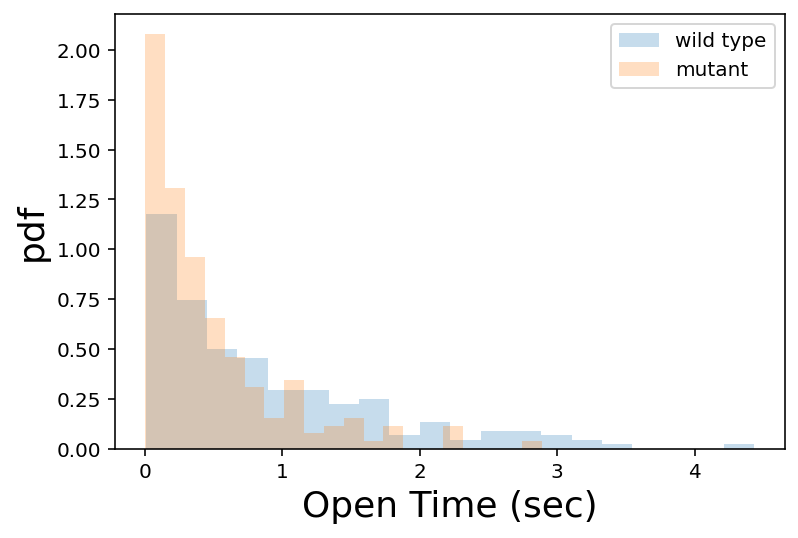

In [5]:
plt.hist(wtOpenTimes_sec, bins=20, density=True, alpha=0.25, label='wild type')
plt.hist(mtOpenTimes_sec, bins=20, density=True, alpha=0.25, label='mutant')
plt.xlabel('Open Time (sec)');
plt.ylabel('pdf')
plt.legend();

### Open times are exponentially, not normally distributed, so we cannot use a t-Test.

### Use a permutation test to decide whether or not each data set came from the same distribution. i.e. whether or not the mutation had any effect on mean open time?

In [14]:
# MLE time constants (tau) from each data set
wtTau_sec = wtOpenTimes_sec.mean()
mtTau_sec = mtOpenTimes_sec.mean()

# difference bewteen wild type and mutant taus
measuredTauDiff = mtTau_sec - wtTau_sec

# concatenate all open times from both wild type and mutant into one big array
nA = len(wtOpenTimes_sec)
nB = len(mtOpenTimes_sec)
allOpenTimes = np.zeros((nA + nB,))
allOpenTimes[:nA] = wtOpenTimes_sec
allOpenTimes[-nB:] = mtOpenTimes_sec

measuredTauDiff

-0.39669983322777774

In [12]:
# generate 1000 permutations of mixtures of open times from both wild type and mutant
# for each permutation store the difference between the taus for the permuted data sets
numPermutations = 1000
permutedTauDiffs = np.zeros((numPermutations,))

for i in range(numPermutations):
    np.random.shuffle(allOpenTimes)
    
    wtPermutedOpenTimes = allOpenTimes[:nA]
    mtPermutedOpenTimes = allOpenTimes[-nB:]
    
    permutedTauDiffs[i] = mtPermutedOpenTimes.mean() - wtPermutedOpenTimes.mean()

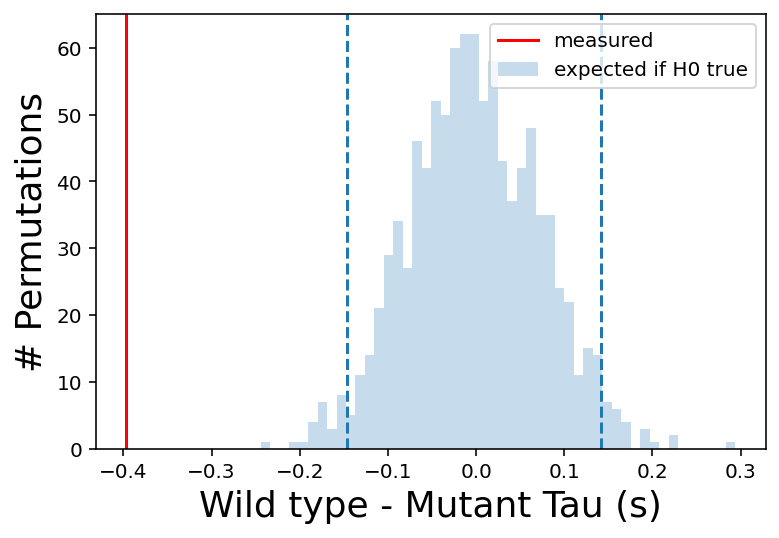

In [13]:
plt.hist(permutedTauDiffs, bins=50, alpha=0.25, label='expected if H0 true');

# add 95% confidence intervals to the plot
lb, ub = np.quantile(permutedTauDiffs, [0.025, 0.975])
plt.axvline(lb, linestyle='--')
plt.axvline(ub, linestyle='--');

# add the measured difference from the original datasets
plt.axvline(measuredTauDiff, color='r', label='measured')
plt.xlabel('Wild type - Mutant Tau (s)')
plt.ylabel('# Permutations')
plt.legend();

### Compute a p-value for the observed difference in time constant between wild type and mutant to be explained by the null hypothesis that the mutation has no effect on open time.

In [34]:
numPermutationsMoreExtreme = (np.abs(permutedTauDiffs) > np.abs(measuredTauDiff)).sum()
numPermutationsMoreExtreme, numPermutations

(0, 1000)

In [33]:
pvalue = numPermutationsMoreExtreme / numPermutations
pvalue

0.0

### Reject the null hypothesis ==> mutation did affect open time.

### Compute effect size.

### For Cohen's d we need to divide the measured change in time constant between mutant and wild type by the standard deviation of the time constant distribution for either wild type or mutant.

### We can estimate the standard deviation of the time constant (mean) using Central Limit Theorem.

In [17]:
sigma = wtOpenTimes_sec.std()
n = len(wtOpenTimes_sec)
sigma_for_mean = sigma / np.sqrt(n)

effectSize_d = measuredTauDiff / sigma_for_mean

effectSize_d

-6.667245724274832

### Effect size is large. Mutation has a big effect on open time.